# Food_Dataset

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the train and test data
train_data=pd.read_excel('Food_Train.xlsx')
test_data=pd.read_excel('Food_Test.xlsx')

In [3]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [4]:
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
#checking first five rows of test data
test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
#checking the shape of train and test data
print('Train_data:',train_data.shape)
print('\n')
print('Test_data:',test_data.shape)

Train_data: (12690, 9)


Test_data: (4231, 8)


# Train Data


In [7]:
#checking the shape of train data
train_data.shape

(12690, 9)

There are 12690 rows and 9 columns in this dataset

In [8]:
#checking all the columns present in this dataset
train_data.columns#checking the shape of train data
train_data.shape

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [9]:
#checking the data types of these columns
train_data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

There are only two Numerical features present in this dataset :'RESTAURANT_ID'and 'Cost' rest are Categorical features

In [10]:
#checking the null values
train_data.isnull().values.any()

True

Yes there are few null values present in this dataset

In [11]:
train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

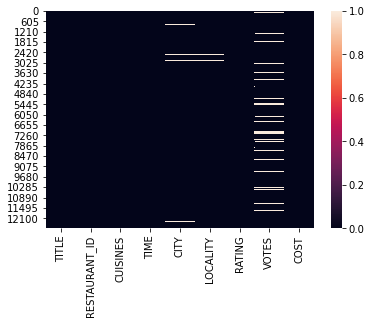

In [12]:
#checking null values using heatmap
sns.heatmap(train_data.isnull())

From this it's observed that missing values are present in City,Locality,Rating and Votes. So we will impute the missing values

In [13]:
#imputing the missing value  with mode of the corresponding column
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
train_data['CITY']=imp.fit_transform(train_data['CITY'].values.reshape(-1,1))
train_data['LOCALITY']=imp.fit_transform(train_data['LOCALITY'].values.reshape(-1,1))
train_data['RATING']=imp.fit_transform(train_data['RATING'].values.reshape(-1,1))
train_data['VOTES']=imp.fit_transform(train_data['VOTES'].values.reshape(-1,1))
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [14]:
#Again checking for missing values
train_data.isnull().values.any()

False

In [15]:
train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

There are no more null values left in this dataset

In [16]:
#Statistical Summary
train_data.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


Maximum cost is 14000 and minimum is 20. There is outlier present in this column. 

In [17]:
#checking unique values for categorical columns and their value_counts
for column in train_data.columns:
    if train_data[column].dtype==object:
        print(str(column) + ':' + str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print('**********************************')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [18]:
#Encoding the attributes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
list1=['TITLE','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES']
for val in list1:
    train_data[val]=le.fit_transform(train_data[val].astype(str))

In [19]:
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,95,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,19,1349,500
12686,33,9686,2143,1177,222,133,24,191,1800
12687,71,11133,2088,1137,239,1342,21,1428,1300
12688,31,6134,3506,1837,67,631,16,996,400


In [20]:
#dropping the columns 'RESTAURANT_ID','TIME','VOTES'
train_data.drop(['RESTAURANT_ID','TIME','VOTES'],axis=1,inplace=True)

In [21]:
train_data

,TITLE,CUISINES,CITY,LOCALITY,RATING,COST
0,31,2627,320,285,17,1200
1,33,289,67,1046,23,1500
2,31,2976,67,1101,19,800
3,95,4130,222,136,22,800
4,50,1766,222,620,19,300
...,...,...,...,...,...,...
12685,95,2934,131,342,19,500
12686,33,2143,222,133,24,1800
12687,71,2088,239,1342,21,1300
12688,31,3506,67,631,16,400


# Data Visualization

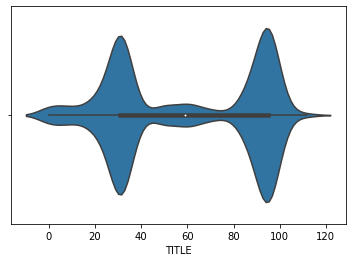

In [22]:
sns.violinplot(x='TITLE',data=train_data)
plt.show()

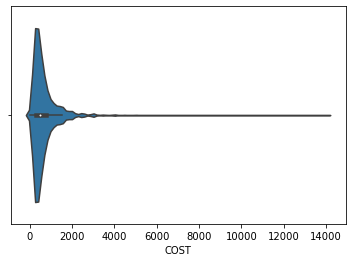

In [23]:
sns.violinplot(x='COST',data=train_data)
plt.show()

Most of the Restaurant's cost fall below 2000 and only few increases till 14000.

In [24]:
#Checking the correlation between the columns
train_data.corr()

,TITLE,CUISINES,CITY,LOCALITY,RATING,COST
TITLE,1.000000,0.244866,-0.016281,0.026614,-0.039748,-0.263581
CUISINES,0.244866,1.000000,0.023931,0.016504,-0.038163,-0.014078
CITY,-0.016281,0.023931,1.000000,0.043072,0.026137,0.044555
LOCALITY,0.026614,0.016504,0.043072,1.000000,-0.023361,-0.015050
RATING,-0.039748,-0.038163,0.026137,-0.023361,1.000000,0.236941
COST,-0.263581,-0.014078,0.044555,-0.015050,0.236941,1.000000


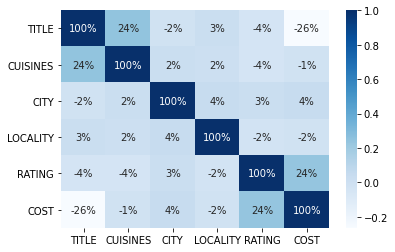

In [25]:
#checking correlation via visualization (heatmap)
sns.heatmap(train_data.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

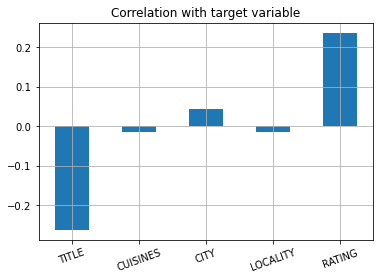

In [26]:
train_data.drop('COST',axis=1).corrwith(train_data['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

Title is the least correlated column with target variable

Rating and City are highly correlated columns with target variable 

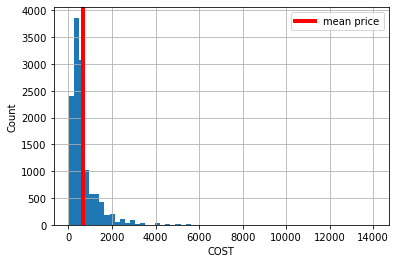

In [27]:
train_data['COST'].hist(bins=60)
mean_val=np.mean(train_data['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean price')
plt.xlabel('COST')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting the Outliers

TITLE          AxesSubplot(0.125,0.536818;0.227941x0.343182)
CUISINES    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
CITY        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
LOCALITY          AxesSubplot(0.125,0.125;0.227941x0.343182)
RATING         AxesSubplot(0.398529,0.125;0.227941x0.343182)
COST           AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

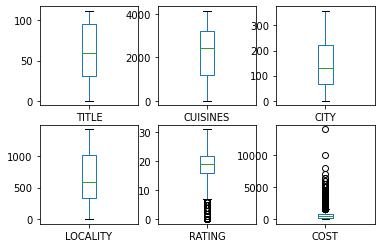

In [28]:
train_data.plot(kind='box',subplots=True,layout=(2,3))

Outliers are present in Rating and Cost

In [29]:
#Detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(train_data))
z

array([[0.86888688, 0.32540837, 2.11776187, 0.92054865, 0.29054698,
        0.86884552],
       [0.80783894, 1.61638078, 0.8970816 , 0.98623851, 0.68015275,
        1.34733058],
       [0.86888688, 0.61526483, 0.8970816 , 1.12404835, 0.0330196 ,
        0.23086546],
       ...,
       [0.35207201, 0.12224961, 1.1525353 , 1.72790605, 0.35658617,
        1.02834054],
       [0.86888688, 1.055448  , 0.8970816 , 0.05359943, 0.45233026,
        0.40711461],
       [0.86888688, 0.59034881, 0.13443345, 1.70535535, 0.61411355,
        0.08812458]])

In [30]:
threshold=3
print(np.where(z>3))

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
         329,   337,   369,   374,   379,   392,   396,   422,   428,
         438,   452,   453,   455,   469,   473,   480,   502,   508,
         563,   577,   604,   615,   625,   644,   690,   731,   749,
         751,   772,   787,   831,   838,   839,   874,   911,   919,
         949,   966,   967,   973,   981,   993,   994,  1009,  1054,
        1126,  1133,  1193,  1196,  1205,  1227,  1287,  1288,  1297,
        1345,  1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,
        1543,  1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,
        1696,  1701,  1711,  1748,  1759,  1764,  1778,  1792,  1806,
        1828,  1839,  1855,  1878,  1884,  1884,  1903,  1916,  1930,
        1931,  1983,  2025,  2039,  2053,  2082,  2092,  2096,  2100,
        2109,  2111,  2115,  2124,  2205,  2207,  2251,  2254,  2313,
        2327,  2333,  2339,  2349,  2369,  2407,  2434,  2439,  2459,
        2479,  2488

In [31]:
df=train_data[(z<3).all(axis=1)] #removing the outliers
df

,TITLE,CUISINES,CITY,LOCALITY,RATING,COST
0,31,2627,320,285,17,1200
1,33,289,67,1046,23,1500
2,31,2976,67,1101,19,800
3,95,4130,222,136,22,800
4,50,1766,222,620,19,300
...,...,...,...,...,...,...
12685,95,2934,131,342,19,500
12686,33,2143,222,133,24,1800
12687,71,2088,239,1342,21,1300
12688,31,3506,67,631,16,400


In [32]:
train_data.shape

(12690, 6)

In [33]:
df.shape

(11972, 6)

718 rows are removed

In [34]:
#checking skewness
df.skew()

TITLE      -0.071799
CUISINES   -0.216128
CITY        0.306613
LOCALITY    0.344343
RATING      0.143057
COST        1.737557
dtype: float64

In [35]:
#Treating skewness of cost via log method
df['COST']=np.log1p(df['COST'])

<ipython-input-35-51225936be03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COST']=np.log1p(df['COST'])


In [36]:
#Again checking the skewness
df.skew()

TITLE      -0.071799
CUISINES   -0.216128
CITY        0.306613
LOCALITY    0.344343
RATING      0.143057
COST        0.175821
dtype: float64

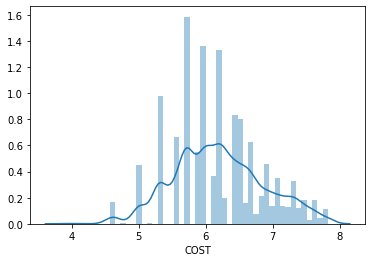

In [37]:
#Checking distribution of cost column--Normally distributed
sns.distplot(df['COST'])

# Test Data

In [4]:
#checking the data types of these columns
test_data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [5]:
#checking the null values
test_data.isnull().values.any()

True

In [7]:
#checking the null values
test_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [8]:
#imputing the missing value  with mode of the corresponding column
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
test_data['CITY']=imp.fit_transform(test_data['CITY'].values.reshape(-1,1))
test_data['LOCALITY']=imp.fit_transform(test_data['LOCALITY'].values.reshape(-1,1))
test_data['RATING']=imp.fit_transform(test_data['RATING'].values.reshape(-1,1))
test_data['VOTES']=imp.fit_transform(test_data['VOTES'].values.reshape(-1,1))
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


In [9]:
test_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [10]:
#checking unique values for categorical columns and their value_counts
for column in train_data.columns:
    if test_data[column].dtype==object:
        print(str(column) + ':' + str(test_data[column].unique()))
        print(test_data[column].value_counts())
        print('**********************************')
        print('\n')

TITLE:['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAKERY,CASUAL DINING' 'BAR' 'FOOD COURT'
 'QUICK BITES,SWEET SHOP' 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR'
 'KIOSK' 'CAFÉ,BAKERY' 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,CAFÉ' 'MESS' 'BAR,CASUAL DINING'
 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR' 'PUB,FINE DINING'
 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING' 'LOUNGE,CASUAL DINING'
 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR' 'CASUAL DINING,SWEET SHOP'
 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB' 'FOOD TRUCK'
 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT PAR

KeyError: 'COST'

In [11]:
#Encoding the attributes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
list1=['TITLE','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES']
for val in list1:
    test_data[val]=le.fit_transform(test_data[val].astype(str))

In [12]:
#dropping the columns 'RESTAURANT_ID','TIME','VOTES'
test_data.drop(['RESTAURANT_ID','TIME','VOTES'],axis=1,inplace=True)

In [13]:
test_data.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING
0,23,1293,110,662,23
1,75,1632,96,221,22
2,23,1455,96,411,18
3,66,208,41,456,18
4,75,1637,78,300,16


# Model Training

In [38]:
#Splitting data into input and output variable
x=df.drop(['COST'],axis=1)
x.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING
0,31,2627,320,285,17
1,33,289,67,1046,23
2,31,2976,67,1101,19
3,95,4130,222,136,22
4,50,1766,222,620,19


In [39]:
#scaling the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [40]:
x=pd.DataFrame(x)

In [41]:
x.columns=['TITLE','CUISINES','CITY','LOCALITY','RATING']

In [42]:
x

,TITLE,CUISINES,CITY,LOCALITY,RATING
0,-0.872329,0.325520,2.100234,-0.917653,-0.500500
1,-0.811513,-1.609257,-0.869811,0.988827,0.699618
2,-0.872329,0.614330,-0.869811,1.126615,-0.100461
3,1.073787,1.569305,0.949782,-1.290933,0.499598
4,-0.294576,-0.386988,0.949782,-0.078401,-0.100461
...,...,...,...,...,...
11967,1.073787,0.579573,-0.118495,-0.774855,-0.100461
11968,-0.811513,-0.075007,0.949782,-1.298448,0.899638
11969,0.343993,-0.120521,1.149350,1.730376,0.299579
11970,-0.872329,1.052923,-0.869811,-0.050843,-0.700520


In [43]:
#target column
y=df['COST'].values
y

array([7.09090982, 7.31388683, 6.68586095, ..., 7.17088848, 5.99396143,
       6.39859493])

In [44]:
#Checking the shape of input and output variable
x.shape

(11972, 5)

In [45]:
y.shape

(11972,)

In [46]:
y=y.reshape(-1,1)
y.shape

(11972, 1)

In [47]:
y

array([[7.09090982],
       [7.31388683],
       [6.68586095],
       ...,
       [7.17088848],
       [5.99396143],
       [6.39859493]])

In [48]:
#Importing all the libraries,metrices required for ML 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [49]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42) 

In [50]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(9577, 5) (2395, 5)


In [51]:
print(y_train.shape,y_test.shape)

(9577, 1) (2395, 1)


In [52]:
#All algorithms using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',Score)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('****************************************')
    print('\n')

Score of LinearRegression() is: 0.21885859664796714
Mean Absolute Error: 0.4524017395376396
Mean Squared Error: 0.33758267585734353
RMSE: 0.5810186536225352
r2_score: 0.24119938352825243
****************************************


Score of Lasso() is: 0.0
Mean Absolute Error: 0.534894401617402
Mean Squared Error: 0.44522486179345333
RMSE: 0.6672517229602734
r2_score: -0.0007530710497267723
****************************************


Score of Ridge() is: 0.218858594110662
Mean Absolute Error: 0.4524030578848666
Mean Squared Error: 0.33758340008442983
RMSE: 0.5810192768613016
r2_score: 0.2411977556486281
****************************************


Score of ElasticNet() is: 0.0
Mean Absolute Error: 0.534894401617402
Mean Squared Error: 0.44522486179345333
RMSE: 0.6672517229602734
r2_score: -0.0007530710497267723
****************************************


Score of SVR() is: 0.4272427477692682
Mean Absolute Error: 0.388691956119899
Mean Squared Error: 0.26440873425467776
RMSE: 0.51420689829549

GradientBoostingRegressor and RandomForestRegressor are working well. 


In [54]:
#Using GridSearchCV for hyper parameter tuning of GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

Using the best params:'learning_rate': 0.1, 'n_estimators': 500 in GradientBoostingRegressor

In [55]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gbr.fit(x_train,y_train)
Sc=gbr.score(x_train,y_train)
predm=gbr.predict(x_test)
print('Score of',gbr,'is:',Sc)
print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
print('Mean Squared Error:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('r2_score:',r2_score(y_test,predm))

Score of GradientBoostingRegressor() is: 0.7533675528504278
Mean Absolute Error: 0.29246629933494783
Mean Squared Error: 0.1422314125232387
RMSE: 0.377135801168808
r2_score: 0.6802996977549634


In [56]:
#Using GridSearchCV for hyper parameter tuning of RandomForestRegressor
rfr=RandomForestRegressor()

parameters={'n_estimators':[150,100,150,200,250,300,350,400,450,500]} #Searching best parameters
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 400}

In [58]:
#Using the best params: 'n_estimators': 400 in RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=400)
rfr.fit(x_train,y_train)
Scr=rfr.score(x_train,y_train)
predm=rfr.predict(x_test)
print('Score of',rfr,'is:',Scr)
print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
print('Mean Squared Error:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('r2_score:',r2_score(y_test,predm))

Score of RandomForestRegressor(n_estimators=400) is: 0.9538643071390568
Mean Absolute Error: 0.30746925622707827
Mean Squared Error: 0.156877483723886
RMSE: 0.39607762335669255
r2_score: 0.6473790277954758


In [59]:
#checking cross_val_score for GradientBoostingRegressor and RandomForestRegressor
from sklearn.model_selection import cross_val_score
print("Mean r2_score for GradientBoostingRegressor:",cross_val_score(gbr,x,y,cv=10,scoring="r2").mean())
print("Standard deviation in r2_score for GradientBoostingRegressor:",cross_val_score(gbr,x,y,cv=10,scoring="r2").std())
print('\n')
print("Mean r2_score for RandomForestRegressor:",cross_val_score(rfr,x,y,cv=10,scoring="r2").mean())
print("Standard deviation in r2_score for RandomForestRegressor:",cross_val_score(rfr,x,y,cv=10,scoring="r2").std())

Mean r2_score for GradientBoostingRegressor: 0.6967720099261456
Standard deviation in r2_score for GradientBoostingRegressor: 0.014375290199872728


Mean r2_score for RandomForestRegressor: 0.661793449704107
Standard deviation in r2_score for RandomForestRegressor: 0.020693574486864666


We are choosing RandomForestRegressor as our final model since it's giving us best score.

In [60]:
#Saving the best model
import joblib
joblib.dump(rfr,'Food_dataset.obj')

['Food_dataset.obj']